# Cassini-Huygens Spacecraft

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")

The file cassini.csv contains data on the location of the Cassini-Huygens spacecraft for the first several years of the probe's mission. We'll visualize the position of the spacecraft around the sun.

In [2]:
cassini = pd.read_csv("./data/cassiniData.csv")
planets = pd.read_csv("./data/planetData.csv")

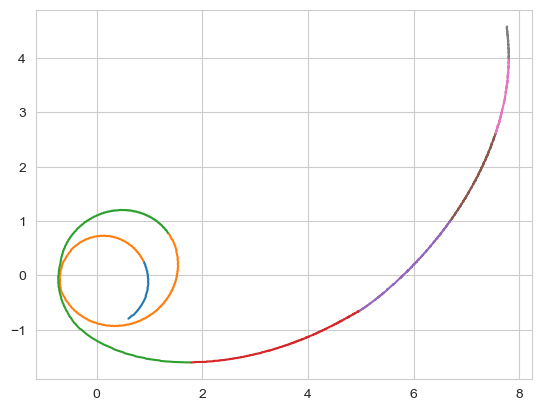

In [3]:
plt.figure()
for k in range(min(cassini.yr), max(cassini.yr)+1):
    plt.plot(cassini.x[cassini.yr==k], cassini.y[cassini.yr==k])
plt.show()

The table planets contains the orbital radius of each of the eight planets in our solar system. We can use the radius to add orbits to our plot. To plot a circle of radius r, we create a vector of angles from 0 to 2π. Then we create the x-y data for the plot using the following formulas:
x = rcos(θ),    y = rsin(θ)

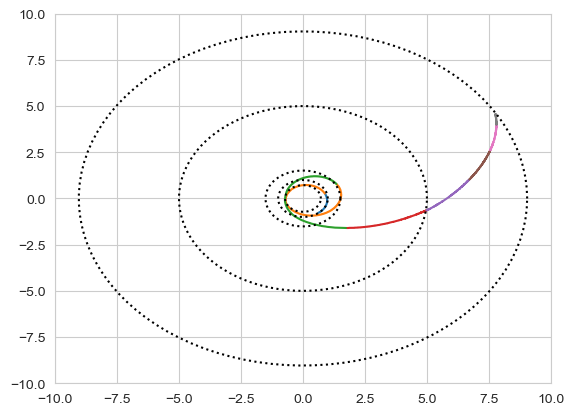

In [4]:
theta = np.linspace(0, 2*np.pi, 100)

plt.figure()
for k in range(min(cassini.yr), max(cassini.yr)+1):
    plt.plot(cassini.x[cassini.yr==k], cassini.y[cassini.yr==k])
for k in np.arange(1, 7):
    plt.plot(planets.Radius[k]*np.cos(theta), planets.Radius[k]*np.sin(theta), color='black', linestyle=':')

plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.show()

Notice in our plot that the spacecraft can be in a planet's orbit for multiple days. How many days did it spend in the orbit of each planet? We can find the distance of the spacecraft from the sun using its x-y-z data in the table cassini.
d = sqrt(x^2 + y^2 + z^2)

In [5]:
d = round(np.sqrt(cassini.x**2 + cassini.y**2 + cassini.z**2), 2)
t = np.zeros((len(planets.Radius)))
for k in range(len(planets.Radius)):
    t[k] = np.count_nonzero(d == planets.Radius[k])
planets["Days"] = t

planets

,Name,Radius,Days
0,Mercury,0.39,0.0
1,Venus,0.72,16.0
2,Earth,1.00,19.0
3,Mars,1.51,9.0
4,Jupiter,5.00,2.0
5,Saturn,9.04,2.0
6,Uranus,19.18,0.0
7,Neptune,30.06,0.0
